**# This program will predict if a passenger will survive on the titanic**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#count the numbers of rows and colums in the dataset
titanic.shape

(891, 15)

In [4]:
  #Get statestical data
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Get a count of the number of survivers
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

C:\Users\Pravansh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

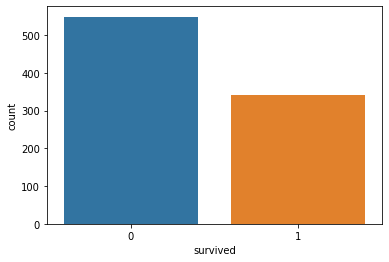

In [6]:
#Visualize the count of survivors
sns.countplot(titanic['survived'])

C:\Users\Pravansh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pravansh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pravansh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

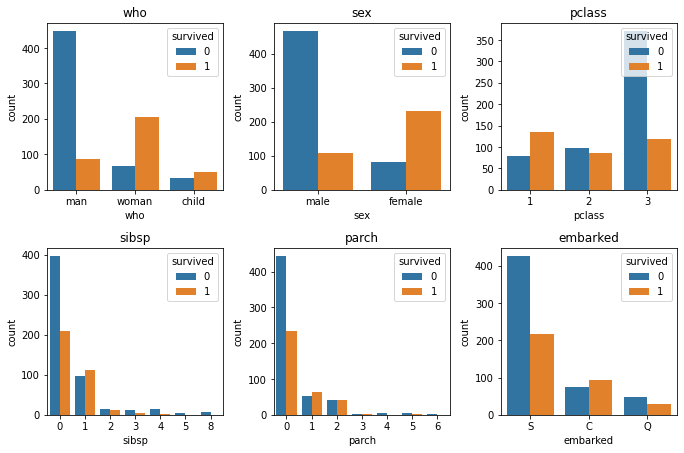

In [7]:
#visualize the count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'

cols=['who','sex','pclass','sibsp','parch','embarked']

n_rows=2
n_cols =3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize =(n_cols * 3.2, n_rows * 3.2))

for  r in range(0, n_rows):
    for c in range(0,n_cols):
        
        i=r*n_cols + c # index to go through the number of columns
        ax =axs[r][c]# show where to plot each subplot
        sns.countplot(titanic[cols[i]], hue= titanic['survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')
plt.tight_layout()

In [8]:
#Look at survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [9]:
# look at survival rate by se and class
titanic.pivot_table('survived', index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

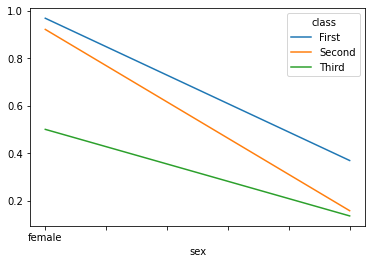

In [10]:
# look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex',columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

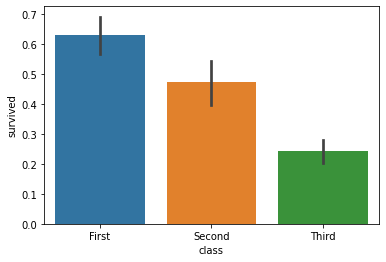

In [11]:
# plot survival rate of each class
sns.barplot(x='class',y='survived',data=titanic)

In [12]:
#Look at survival rate by sex, age and class
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

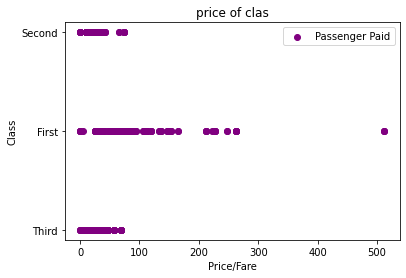

In [13]:
#plot the prices paid of each class
plt.scatter(titanic['fare'],titanic['class'],color='purple',label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price/Fare')
plt.title('price of clas')
plt.legend()
plt.show()

In [14]:
# count the empty values in each colums
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
#look at all of the values in each column and get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [16]:
#drop the columns
titanic=titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'],axis=1)

# remove the rows with missing values
titanic = titanic.dropna(subset=['embarked','age'])

In [17]:
# Count the new number of rows and columns in the data set
titanic.shape

(712, 8)

In [18]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [19]:
# look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [20]:
#print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:,2]=labelencoder.fit_transform( titanic.iloc[:,2].values)

#Encode the embark column
titanic.iloc[:,7] = labelencoder.fit_transform( titanic.iloc[:,7].values)


#print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [22]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [23]:
#split the data into independent 'X and dependent 'Y variables
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [24]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)



#Sclae the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit(X_train)
X_test = sc.fit(X_test)

#Create a function with many machine learning models
def models(X_train, Y_train):
    
    #Use logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Use SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train ,Y_train)
    
    #Use SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train ,Y_train)
    
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use ecision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
    tree.fit(X_train, Y_train)
    
    #Use the RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state = 0)
    forest.fit(X_train,Y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ',log.score(X_train,Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train,Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train,Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train,Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train,Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train,Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train,Y_train))
    
    return log, knn , svc_lin, svc_rbf ,gauss ,tree ,forest

    

In [25]:
#Get and train al of the models
model = models(X_train ,Y_train)


TypeError: float() argument must be a string or a real number, not 'StandardScaler'

In [ ]:
# Show the confussion matrix and accuracy for all of hte models on the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    cm= confusion_matrix(Y_test, model[i].predict(X_test))
    
    #Extract TN, FP , FN, TP
    TN, FP, FN, TP =confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN +FP)
    print(cm)
    print('Model[{}] Testing Accuracy ="{}"'.format(i, test_score ))
    print()

In [ ]:
#Get feature importance
forest= model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances= importances.sort_values('importance', ascending = False).set_index('feature')
importances

In [ ]:
#Visualize the importance
importances.plot.bar()

In [ ]:
# print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#print the actual values
print(Y_test)

In [ ]:


#my Survival
my_survival = [[3,1,21,0, 0, 0, 1 ]]
my_survival_scaled = fitted.transform(my_survival)
#print prediction
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print("Ohn you didnt survive!!")
else:
  print('Congrats you made it!')


